# SALES PERFORMANCE ANALYSIS AND PREDICTION MODEL

GUIDELINES

- Focus on the product,category of products that sell more and have higher profit,location where its being sold (Region and city),products that were bought more than once consecutively 
- Focus on the customers, category of customers, which location the highest category comes from
- Date, time-series analysis, trend across weeks, months and years, 
- Ship mode that generated more sales, profit 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [2]:
data = pd.read_excel("Superstore.xlsx")

# SALES ANALYSIS

## Data Cleaning

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.describe

<bound method NDFrame.describe of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2013-152156 2013-11-09 2013-11-12    Second Class   
1          2  CA-2013-152156 2013-11-09 2013-11-12    Second Class   
2          3  CA-2013-138688 2013-06-13 2013-06-17    Second Class   
3          4  US-2012-108966 2012-10-11 2012-10-18  Standard Class   
4          5  US-2012-108966 2012-10-11 2012-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2011-110422 2011-01-22 2011-01-24    Second Class   
9990    9991  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9991    9992  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9992    9993  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9993    9994  CA-2014-119914 2014-05-05 2014-05-10    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consume

### Dropping unwanted columns

In [5]:
data.drop(columns= ['Customer Name'], inplace= True)

In [6]:
data.drop(columns= ['Country'], inplace= True)

## Data Manipulation and Visualization For Insight

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

The top 10 most sold products from 2011 - 2015  

As seen below, staples is the most sold by a mile.

In [8]:
most_sold = data.groupby('Product Name')[['Quantity']].sum().sort_values(by='Quantity',ascending=False)
most_sold.head(20)

,Quantity
Product Name,
Staples,876
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
Wilson Jones Turn Tabs Binder Tool for Ring Binders,59


The category of products that were sold the most is the Office Supplies Category

,Quantity
Category,
Office Supplies,22906
Furniture,8028
Technology,6939


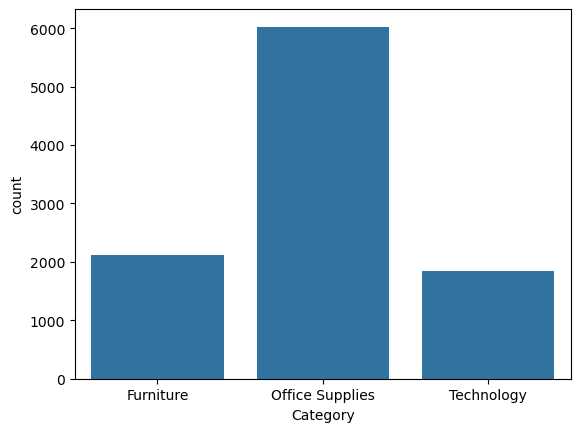

In [9]:
sns.countplot(x= 'Category',data=data)
data.groupby('Category')[['Quantity']].sum().sort_values(by= 'Quantity', ascending= False)

BUT..The category of sales that generated the most amount of money is...

In [22]:
data.groupby('Category')[['Sales']].sum().sort_values(by= 'Sales', ascending= False)

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


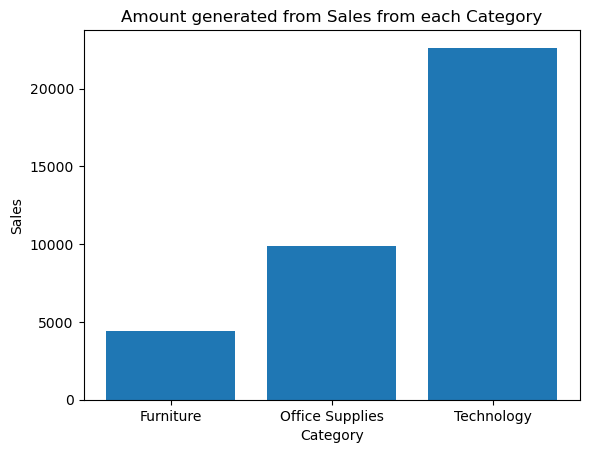

In [ ]:
plt.bar(data['Category'], data['Sales'])
plt.title('Amount generated from Sales from each Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

The ship mode with the most Sales,Profit and Discount was the standard class

,Sales,Profit,Discount,Quantity
Ship Mode,,,,
Standard Class,1.358216e+06,164088.7875,955.02,22797
Second Class,4.591936e+05,57446.6354,270.15,7423
First Class,3.514284e+05,48969.8399,253.17,5693
Same Day,1.283631e+05,15891.7589,82.75,1960


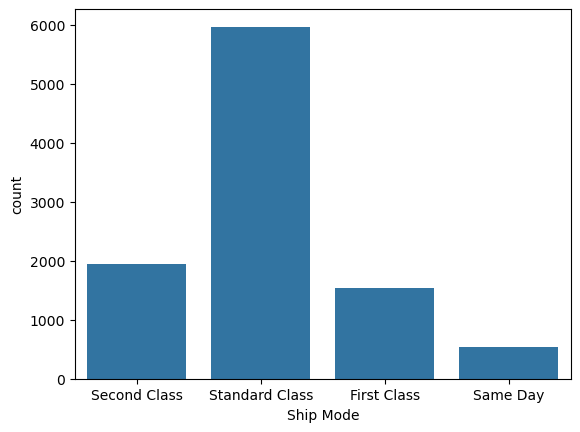

In [20]:
sns.countplot(x=data['Ship Mode'], data=data)
data.groupby('Ship Mode')[['Sales','Profit','Discount','Quantity']].sum().sort_values(by= 'Sales', ascending= False)

Total amount sold per ship mode

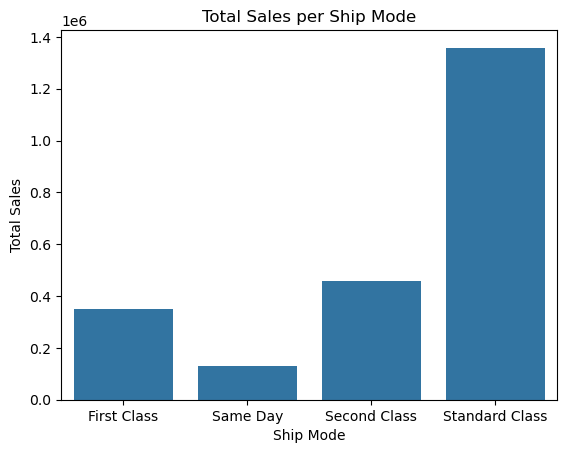

In [21]:
shipmode_sales = data.groupby('Ship Mode', as_index=False)['Sales'].sum()

sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales)

plt.title('Total Sales per Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()


This describe the sales per region

In [ ]:
data.groupby('Region')[['Sales','Profit','Discount','Quantity']].sum().sort_values(by= 'Sales', ascending= False)


,Sales,Profit,Discount,Quantity
Region,,,,
West,725457.8245,108418.4489,350.20,12266
East,678781.2400,91522.7800,414.00,10618
Central,501239.8908,39706.3625,558.34,8780
South,391721.9050,46749.4303,238.55,6209


<Axes: xlabel='Region', ylabel='count'>

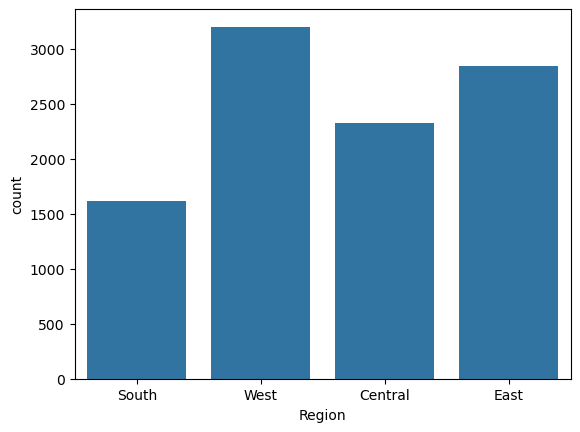

In [14]:
sns.countplot(x=data['Region'],data=data)

In [ ]:
data[data['Profit'] < 0].value_counts()

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Segment      City             State       Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                                                        Sales     Quantity  Discount  Profit   
4       US-2012-108966  2012-10-11  2012-10-18  Standard Class  SO-20335     Consumer     Fort Lauderdale  Florida     33311        South    FUR-TA-10000577  Furniture        Tables        Bretford CR4500 Series Slim Rectangular Table                                       957.5775  5         0.45      -383.0310    1
6971    CA-2014-153822  2014-09-20  2014-09-26  Standard Class  AB-10105     Consumer     Phoenix          Arizona     85023        West     OFF-ST-10000321  Office Supplies  Storage       Akro Stacking Bins                                                                  12.6240   2         0.20      -2.5248      1
7075    CA-2013-112256  2013-07-24  2013-07-29  Sta

In [ ]:
data.value_counts()

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Segment      City         State          Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                                               Sales    Quantity  Discount  Profit   
1       CA-2013-152156  2013-11-09  2013-11-12  Second Class    CG-12520     Consumer     Henderson    Kentucky       42420        South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                                          261.960  2         0.0        41.9136     1
6666    CA-2013-115483  2013-07-15  2013-07-19  Second Class    JS-15880     Consumer     Irving       Texas          75061        Central  OFF-PA-10001497  Office Supplies  Paper         Xerox 1914                                                                 219.840  5         0.2        79.6920     1
6659    CA-2014-135937  2014-02-21  2014-02-28  Standard Class  KM-16375     Home Of

In [ ]:
data['Profit'].sum()

286397.0216999999

In [ ]:
data.groupby(['Segment','Ship Mode'])[['Sales','Profit','Discount']].sum().sort_values(by= 'Profit', ascending= False)

Sales      Profit  Discount
Segment     Ship Mode                                        
Consumer    Standard Class  710137.0714  77924.0490    501.19
Corporate   Standard Class  409040.5351  57470.8067    294.24
Home Office Standard Class  239038.1365  28693.9318    159.59
Consumer    Second Class    231498.9496  24946.9112    145.16
            First Class     159168.9650  21374.0436    123.91
Corporate   Second Class    146126.0388  18225.7131     84.09
            First Class     105858.4699  14464.4724     83.12
Home Office Second Class     81568.5810  14274.0111     40.90
            First Class      86400.9880  13131.3239     46.14
Consumer    Same Day         60596.3590   9874.2054     50.65
Home Office Same Day         22645.4430   4199.4117     15.70
Corporate   Same Day         45121.3230   1818.1418     16.40

In [ ]:
data.groupby(['State','City','Region'])[['Sales','Profit','Discount']].sum().sort_values(by= 'Sales', ascending= False)

Sales      Profit  Discount
State        City          Region                                   
New York     New York City East     256368.161  62036.9837      51.4
California   Los Angeles   West     175851.341  30440.7579      55.5
Washington   Seattle       West     119540.742  29156.0967      27.8
California   San Francisco West     112669.092  17507.3854      34.0
Pennsylvania Philadelphia  East     109077.013 -13837.7674     175.5
...                                        ...         ...       ...
Florida      Ormond Beach  South         2.808     -1.9656       0.7
             Pensacola     South         2.214     -1.4760       0.7
             Jupiter       South         2.064      0.1548       0.2
Ohio         Elyria        East          1.824     -1.3984       0.7
Texas        Abilene       Central       1.392     -3.7584       0.8

[604 rows x 3 columns]

The market segment that produces more sales

<Axes: xlabel='Segment', ylabel='count'>

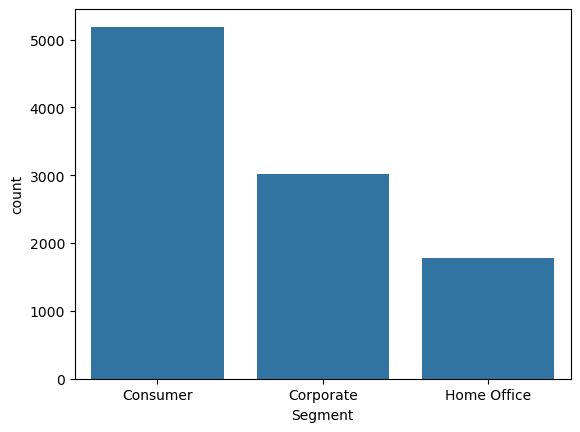

In [30]:
sns.countplot(x= 'Segment',data=data)

The relationship between Sales and Profit is a positive one. The higher the sales, the higher the profit regardless of the current/past discount.

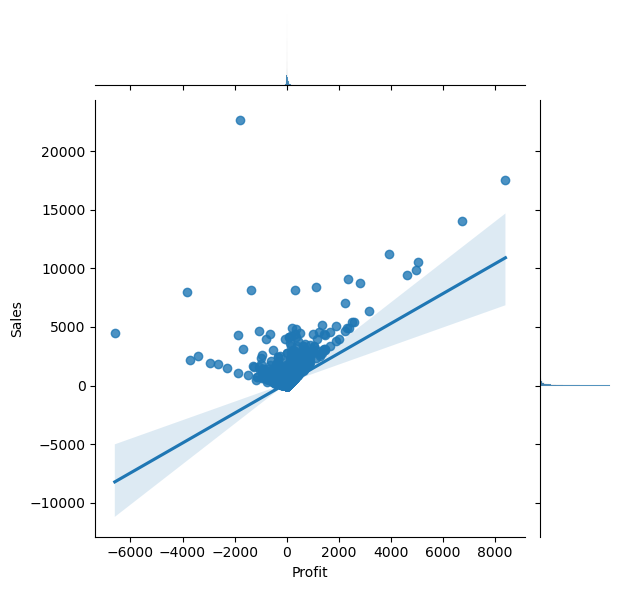

In [23]:
g = sns.JointGrid(x="Profit", y="Sales", data=data)
g.plot(sns.regplot, sns.histplot)


This heatmap showa the different relationships between different variables.

<Axes: >

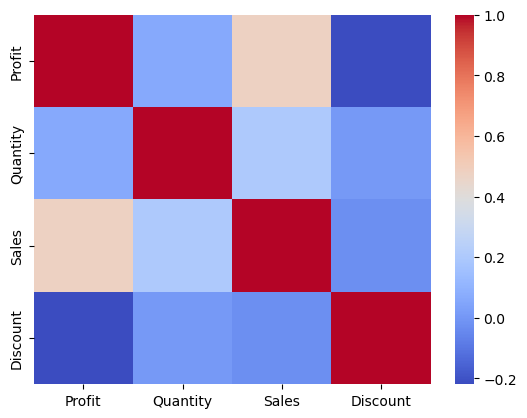

In [26]:
sns.heatmap(data[['Profit','Quantity','Sales','Discount',]].corr(),cmap='coolwarm')

These are the products that were bought more than once consecutively by the same customer.

C:\Users\HP\AppData\Local\Temp\ipykernel_16372\1025778302.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


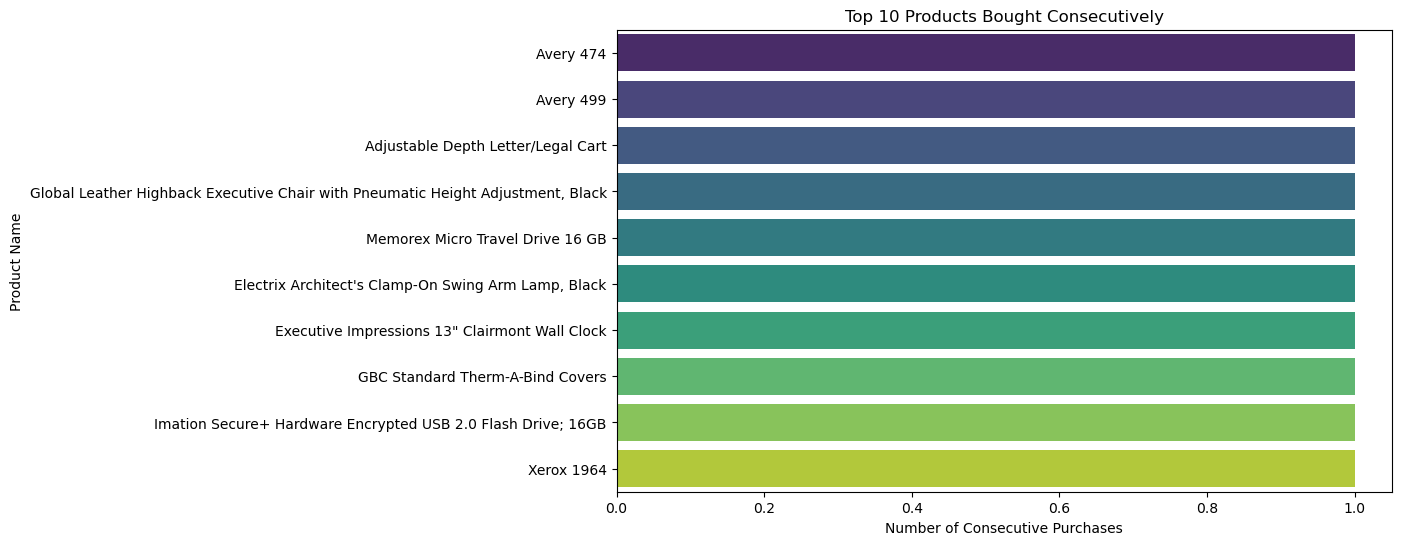

In [29]:
# Sort data by customer and order date
data_sorted = data.sort_values(['Customer ID', 'Order Date'])

# Check if the current product is the same as the previous product for the same customer
data_sorted['Consecutive_Buy'] = (
    (data_sorted['Customer ID'] == data_sorted['Customer ID'].shift(1)) &
    (data_sorted['Product ID'] == data_sorted['Product ID'].shift(1))
)

# Filter rows where product was bought consecutively
consecutive_purchases = data_sorted[data_sorted['Consecutive_Buy'] == True]

consecutive_counts = consecutive_purchases['Product Name'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Pick top 10 products with most consecutive purchases
top_products = consecutive_counts.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products Bought Consecutively')
plt.xlabel('Number of Consecutive Purchases')
plt.ylabel('Product Name')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10528\3819989563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Sales", data=data,palette='rainbow')


<Axes: xlabel='Category', ylabel='Sales'>

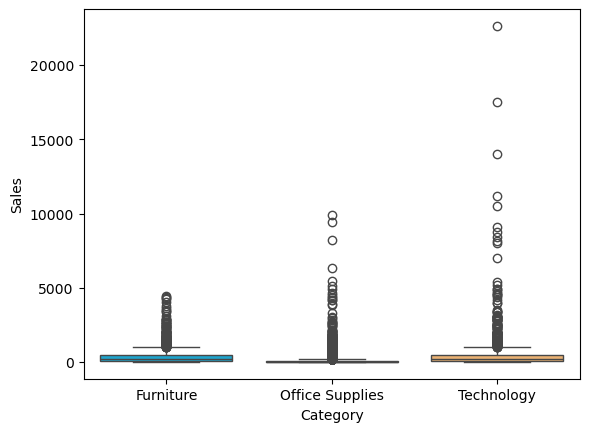

In [ ]:
sns.boxplot(x="Category", y="Sales", data=data,palette='rainbow')

C:\Users\HP\AppData\Local\Temp\ipykernel_10528\3396125643.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Region", y="Sales", data=data,palette='rainbow')


<Axes: xlabel='Region', ylabel='Sales'>

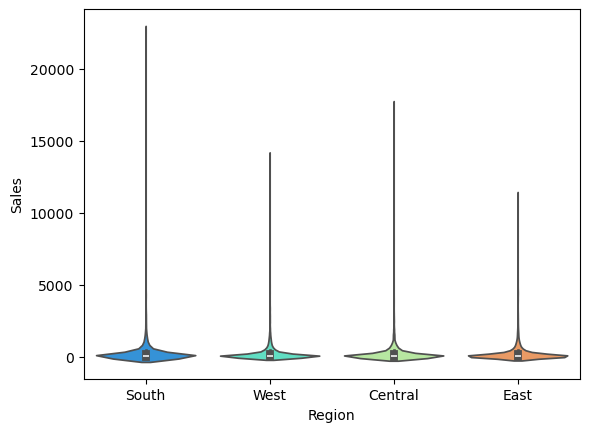

In [ ]:
sns.violinplot(x="Region", y="Sales", data=data,palette='rainbow')

These plots will give us understanding of sales trend over the years.

In [31]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

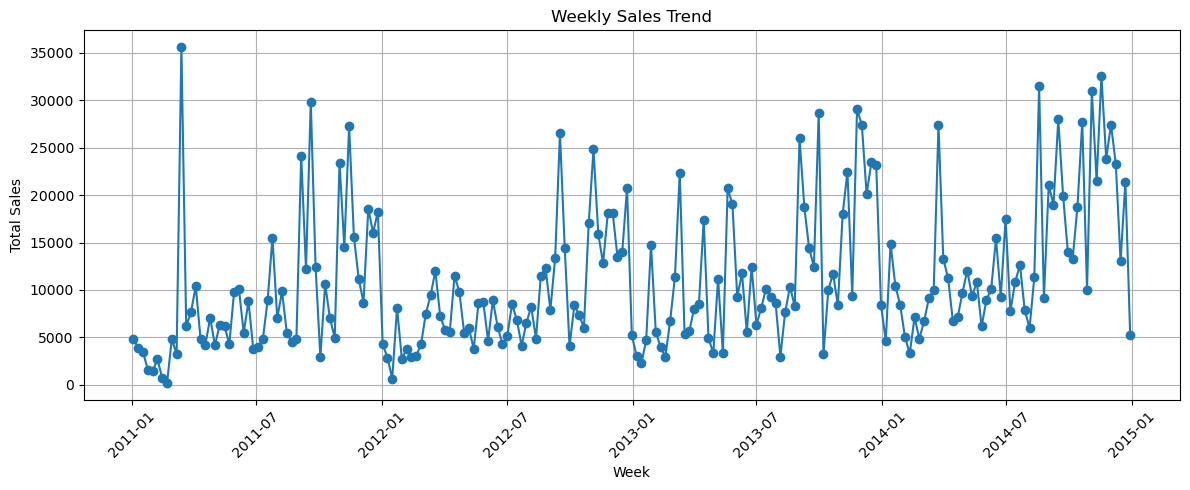

In [ ]:
data['Week'] = data['Order Date'].dt.to_period('W').dt.start_time
weekly_sales = data.groupby('Week')['Sales'].sum().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(weekly_sales['Week'], weekly_sales['Sales'], marker='o', linestyle='-')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


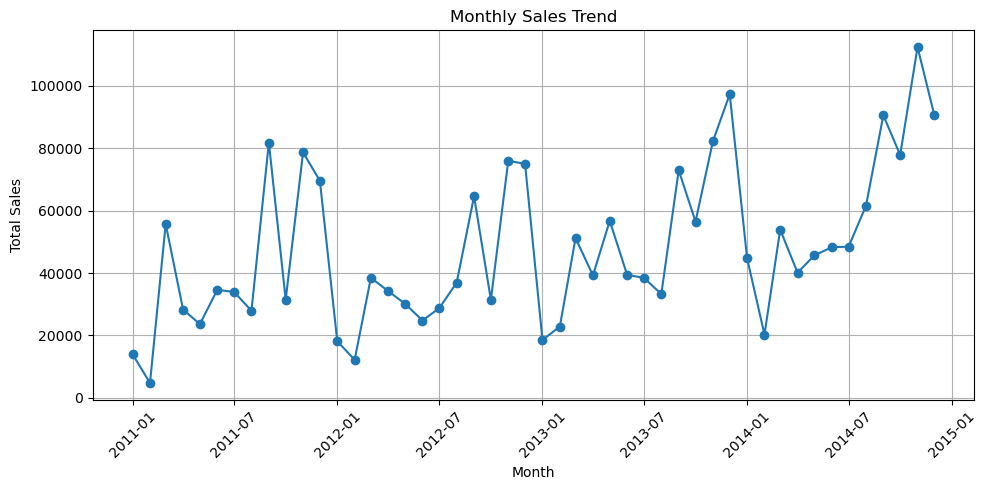

In [33]:
# Create a 'Month' column for grouping
data['Month'] = data['Order Date'].dt.to_period('M').dt.to_timestamp()

# Group sales by month
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


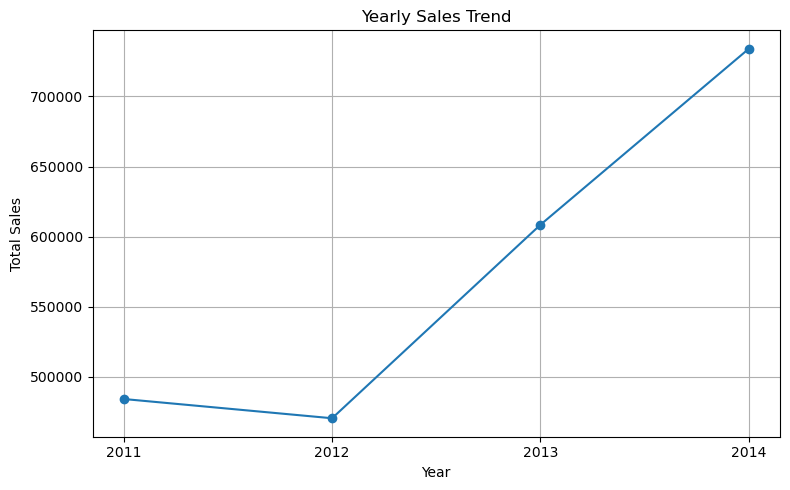

In [ ]:
data['Year'] = data['Order Date'].dt.year
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(yearly_sales['Year'])
plt.tight_layout()
plt.show()


Analyzing sales with discounts

In [ ]:
data[data['Discount'] > 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Week,Year
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012-10-01,2012-10-08,2012
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012-10-01,2012-10-08,2012
7,8,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2011-06-01,2011-06-06,2011
8,9,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2011-06-01,2011-06-06,2011
10,11,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Consumer,Los Angeles,California,90032,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,2011-06-01,2011-06-06,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,US-2013-103674,2013-12-07,2013-12-11,Standard Class,AP-10720,Home Office,Los Angeles,California,90032,...,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.3760,4,0.20,4.6816,2013-12-01,2013-12-02,2013
9979,9980,US-2013-103674,2013-12-07,2013-12-11,Standard Class,AP-10720,Home Office,Los Angeles,California,90032,...,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.4720,14,0.20,153.1152,2013-12-01,2013-12-02,2013
9981,9982,CA-2014-163566,2014-08-04,2014-08-07,First Class,TB-21055,Consumer,Fairfield,Ohio,45014,...,Office Supplies,Labels,Avery 476,16.5200,5,0.20,5.3690,2014-08-01,2014-08-04,2014
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Consumer,Miami,Florida,33180,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2011-01-01,2011-01-17,2011


Analyzing the losses and the areas that caused them.

In [45]:
loss_data = data[data['Profit'] < 0]
loss_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012-10-01
14,15,US-2012-118983,2012-11-22,2012-11-26,Standard Class,HP-14815,Home Office,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,2012-11-01
15,16,US-2012-118983,2012-11-22,2012-11-26,Standard Class,HP-14815,Home Office,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,2012-11-01
23,24,US-2014-156909,2014-07-17,2014-07-19,Second Class,SF-20065,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,2014-07-01
27,28,US-2012-150630,2012-09-17,2012-09-21,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,2012-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2013-149272,2013-03-16,2013-03-20,Standard Class,MY-18295,Corporate,Bryan,Texas,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176,2013-03-01
9921,9922,CA-2011-111360,2011-11-24,2011-11-30,Standard Class,AT-10435,Home Office,Akron,Ohio,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936,2011-11-01
9931,9932,CA-2012-104948,2012-11-13,2012-11-17,Standard Class,KH-16510,Consumer,San Bernardino,California,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960,2012-11-01
9937,9938,CA-2013-164889,2013-06-04,2013-06-07,Second Class,CP-12340,Corporate,Los Angeles,California,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772,2013-06-01


In [46]:
loss_data.groupby('Category')[['Sales']].sum().sort_values(by='Sales', ascending=False)

,Sales
Category,
Furniture,257885.5868
Technology,119212.8930
Office Supplies,91608.6750


C:\Users\HP\AppData\Local\Temp\ipykernel_16372\1815500368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_by_category.index, y=loss_by_category.values, palette='Reds_r')


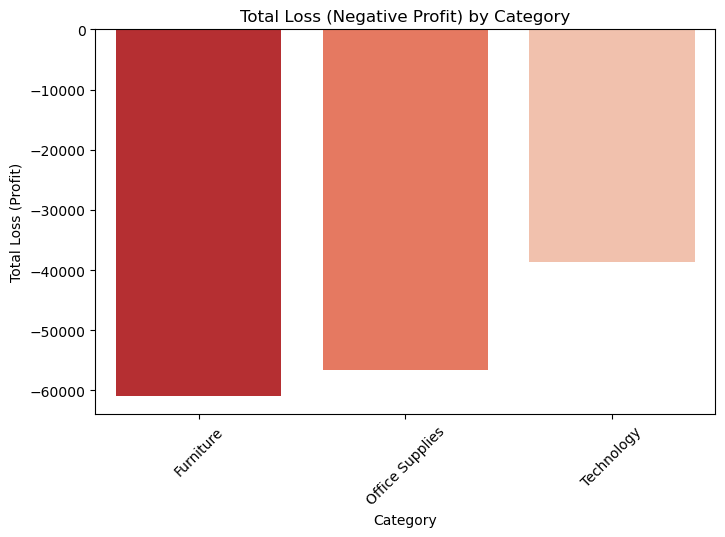

In [ ]:
# Sum losses by category (profit is negative, so sum will be negative)
loss_by_category = loss_data.groupby('Category')['Profit'].sum().sort_values()

# Plot bar chart - losses will show as negative values
plt.figure(figsize=(8,5))
sns.barplot(x=loss_by_category.index, y=loss_by_category.values, palette='Reds_r')
plt.title('Total Loss (Negative Profit) by Category')
plt.ylabel('Total Loss (Profit)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()
